In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import seaborn as sns
import sys
import os
import shutil

'/Users/nguyenthiminhhien/CEL_'

In [20]:
source="Simple Data.zip"
shutil.unpack_archive(source,'./','zip')

In [10]:
Sales_Test="sales_test.csv"
Canceled_Test="canceled_test.csv"
Sales_Df=pd.read_csv(Sales_Test)
Canceled_Df=pd.read_csv(Canceled_Test)

In [41]:
Sales_Df.head(10)

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
0,528758,2017-01-03,1,1358538.0,111931,70.0,70.0
1,528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
2,528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
3,528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
4,528791,2017-01-03,4,1254798.0,10106111,10.0,10.0
5,528791,2017-01-03,5,1254798.0,10105916,15.0,15.0
6,528791,2017-01-03,6,1254798.0,10106230,15.0,15.0
7,528791,2017-01-03,7,1254798.0,10106229,15.0,15.0
8,528791,2017-01-03,8,1254798.0,1040726,15.0,15.0
9,528791,2017-01-03,9,1254798.0,10098739,550.0,550.0


In [40]:
Sales_Df.describe()

,Order No,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
count,28315.000000,28315.000000,2.831500e+04,2.831500e+04,28315.000000,28315.000000
mean,536330.828289,3.548508,8.571873e+06,4.897559e+06,6.471305,6.471305
std,4339.727923,3.388066,1.563677e+07,4.564069e+06,36.203671,36.203671
min,528758.000000,1.000000,1.254612e+06,1.104410e+05,1.000000,1.000000
25%,532522.000000,1.000000,1.255615e+06,1.040725e+06,1.000000,1.000000
50%,536359.000000,2.000000,1.740542e+06,1.041106e+06,1.000000,1.000000
75%,540127.500000,5.000000,2.247534e+06,1.013370e+07,2.000000,2.000000
max,543766.000000,47.000000,4.382536e+07,1.013801e+07,2000.000000,2000.000000


In [23]:
Canceled_Df.head(10)

,Order Number,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
0,528703,1,2017-01-03,1857566.0,10135139,1,1
1,528705,1,2017-01-03,1857566.0,10135140,1,1
2,528706,2,2017-01-03,1857566.0,10135138,1,1
3,528707,1,2017-01-03,1857566.0,10135132,1,1
4,528708,1,2017-01-03,1857566.0,10135359,1,1
5,528710,1,2017-01-03,1857566.0,10135364,1,1
6,528711,1,2017-01-03,1857566.0,10135358,1,1
7,528712,1,2017-01-03,1857566.0,10133703,1,1
8,528713,1,2017-01-03,1857566.0,10135131,1,1
9,528714,1,2017-01-03,1857566.0,10135363,1,1


In [42]:
Canceled_Df.describe()

,Order Number,Line Number,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
count,3662.000000,3662.000000,3.662000e+03,3.662000e+03,3662.000000,3662.000000
mean,537084.880393,4.562534,8.950797e+06,6.700760e+06,8.714637,8.714637
std,3498.398809,4.093325,1.600894e+07,4.424588e+06,85.915973,85.915973
min,528703.000000,1.000000,6.299800e+04,1.104410e+05,1.000000,1.000000
25%,534856.000000,1.000000,1.255616e+06,1.040774e+06,1.000000,1.000000
50%,537724.000000,3.000000,1.653099e+06,1.013370e+07,1.000000,1.000000
75%,539391.750000,6.000000,2.246049e+06,1.013536e+07,3.000000,3.000000
max,543491.000000,27.000000,4.382536e+07,1.013801e+07,4500.000000,4500.000000


In [117]:
Sale_Shipped=Sales_Df[['Order Date','Quantity Shipped']].groupby('Order Date').sum().reset_index()
Sale_Shipped_Jan=Sale_Shipped.loc[Sale_Shipped['Order Date']<='2017-01-31']
Sale_Shipped_Feb=Sale_Shipped.loc[Sale_Shipped['Order Date']>'2017-01-31']

In [127]:
Sale_Canceled=Canceled_Df[['Order Date','Quantity Canceled']].groupby('Order Date').sum().reset_index()
Sale_Canceled_Jan=Sale_Canceled.loc[Sale_Canceled['Order Date']<='2017-01-31']
Sale_Canceled_Feb=Sale_Canceled.loc[Sale_Canceled['Order Date']>'2017-01-31']

<Figure size 432x288 with 0 Axes>

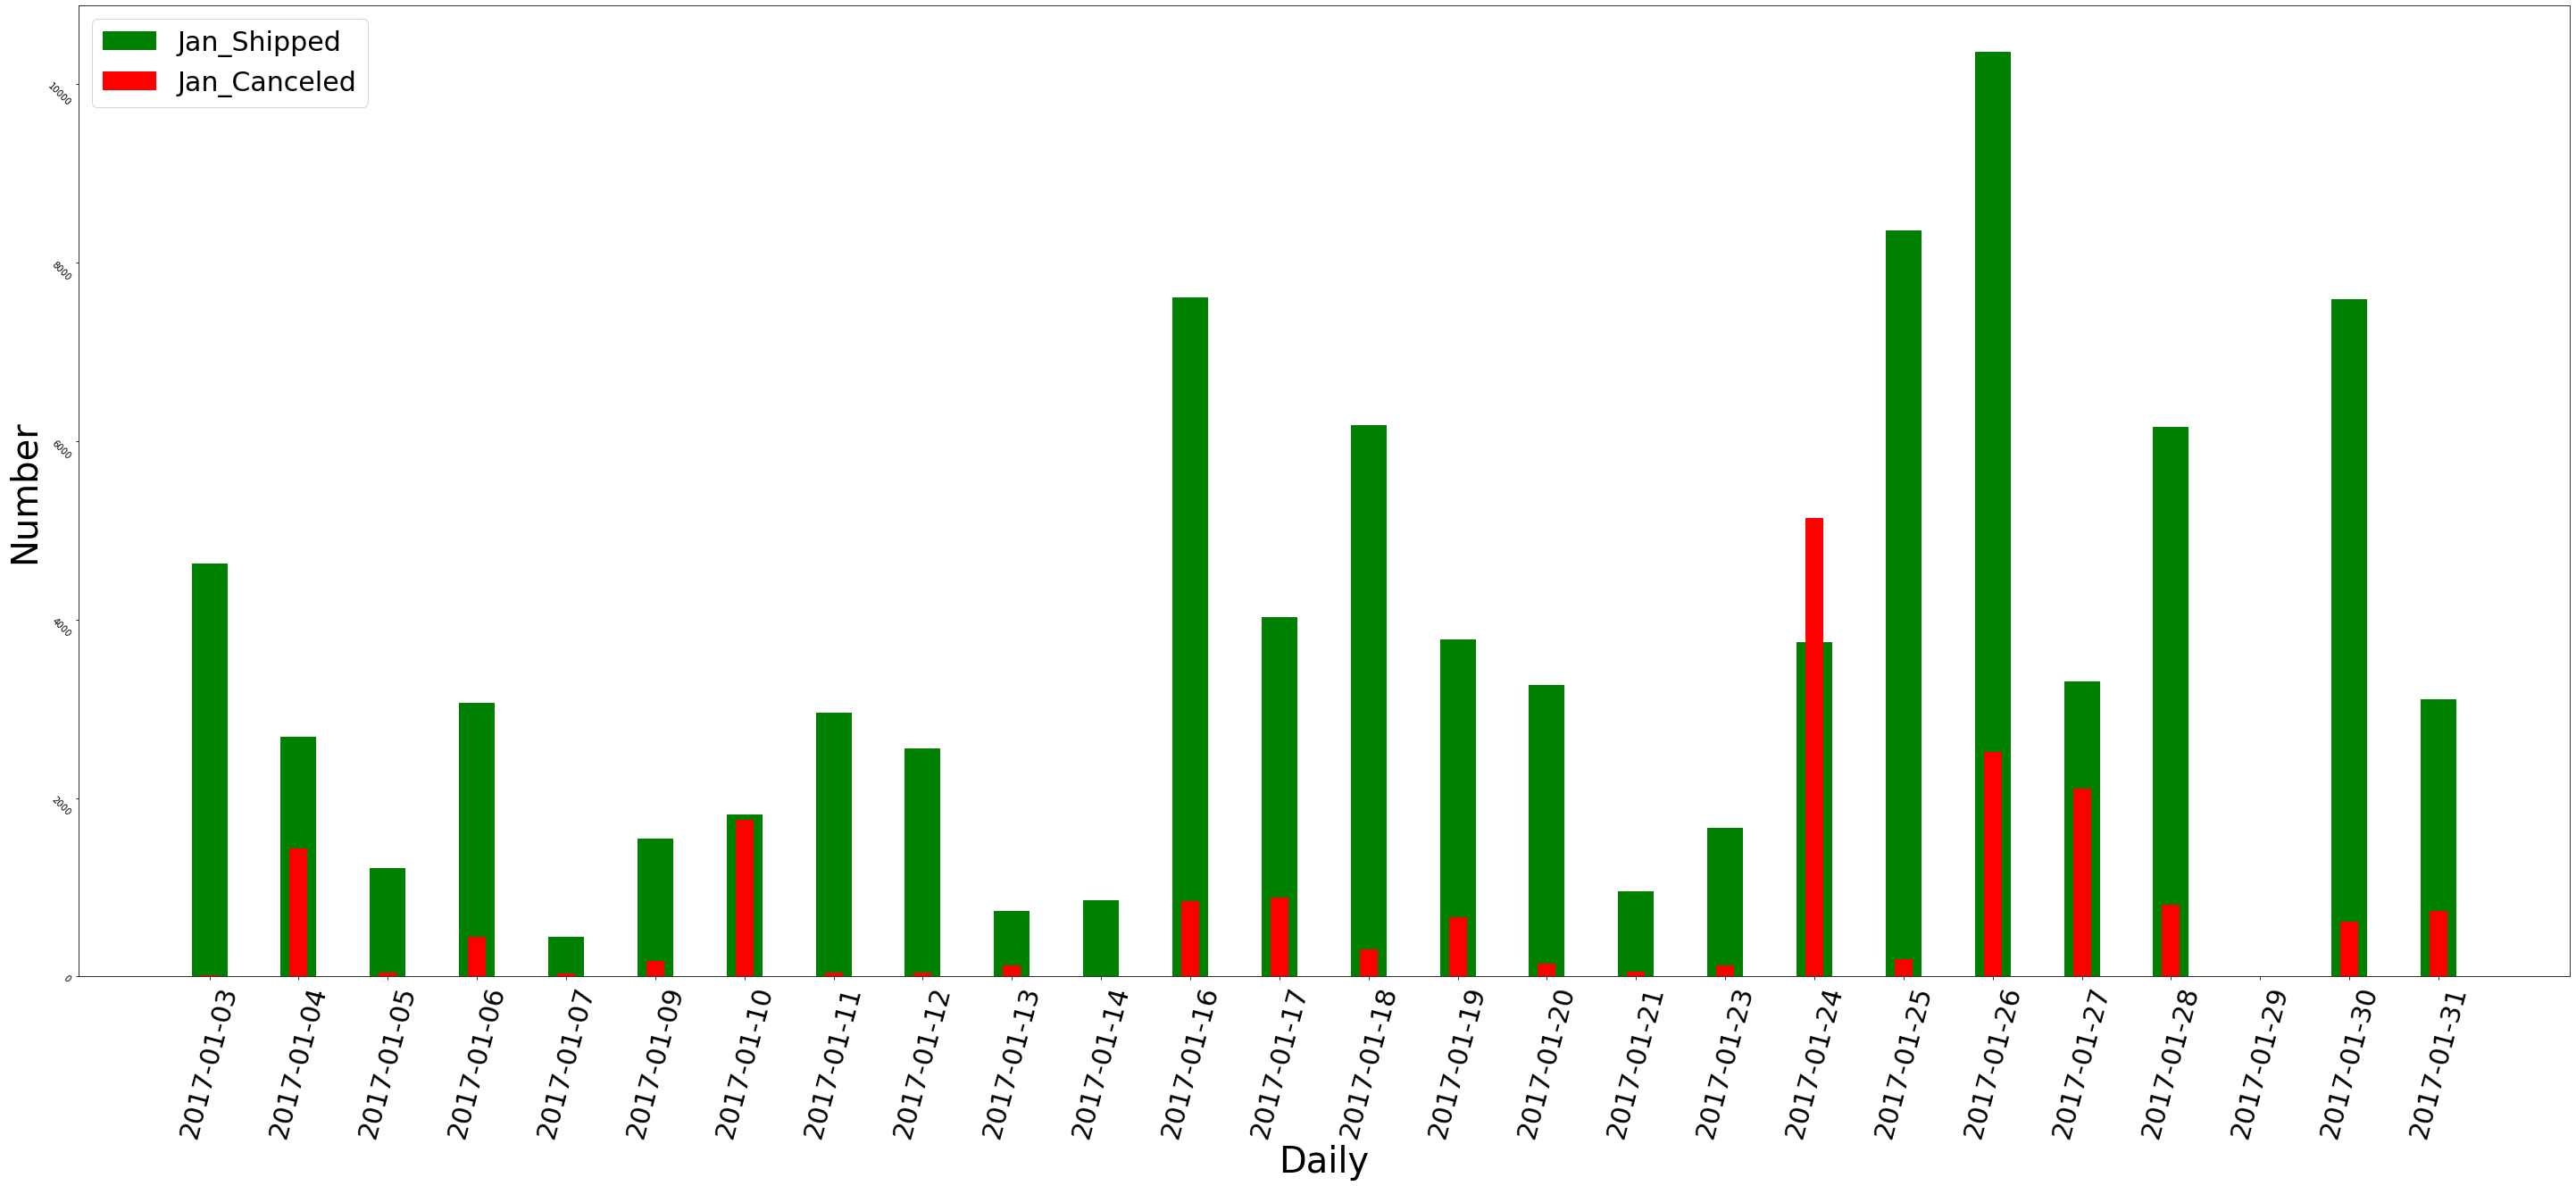

In [171]:

fig = plt.figure()
fig,ax=plt.subplots(figsize=(50,20))

offset = 0.125
ax.bar(Sale_Shipped_Jan['Order Date'],Sale_Shipped_Jan['Quantity Shipped'],color='g',width = 0.4,label = 'Jan_Shipped')
ax.bar(Sale_Canceled_Jan['Order Date'],Sale_Canceled_Jan['Quantity Canceled'],color='r',width = 0.2, label= 'Jan_Canceled')
ax.set_xlabel('Daily',fontsize=40)
plt.xticks(rotation=75)
ax.set_ylabel('Number',fontsize=40)
plt.yticks(rotation=-45)
ax.legend(loc=2,prop={'size': 30})


<Figure size 432x288 with 0 Axes>

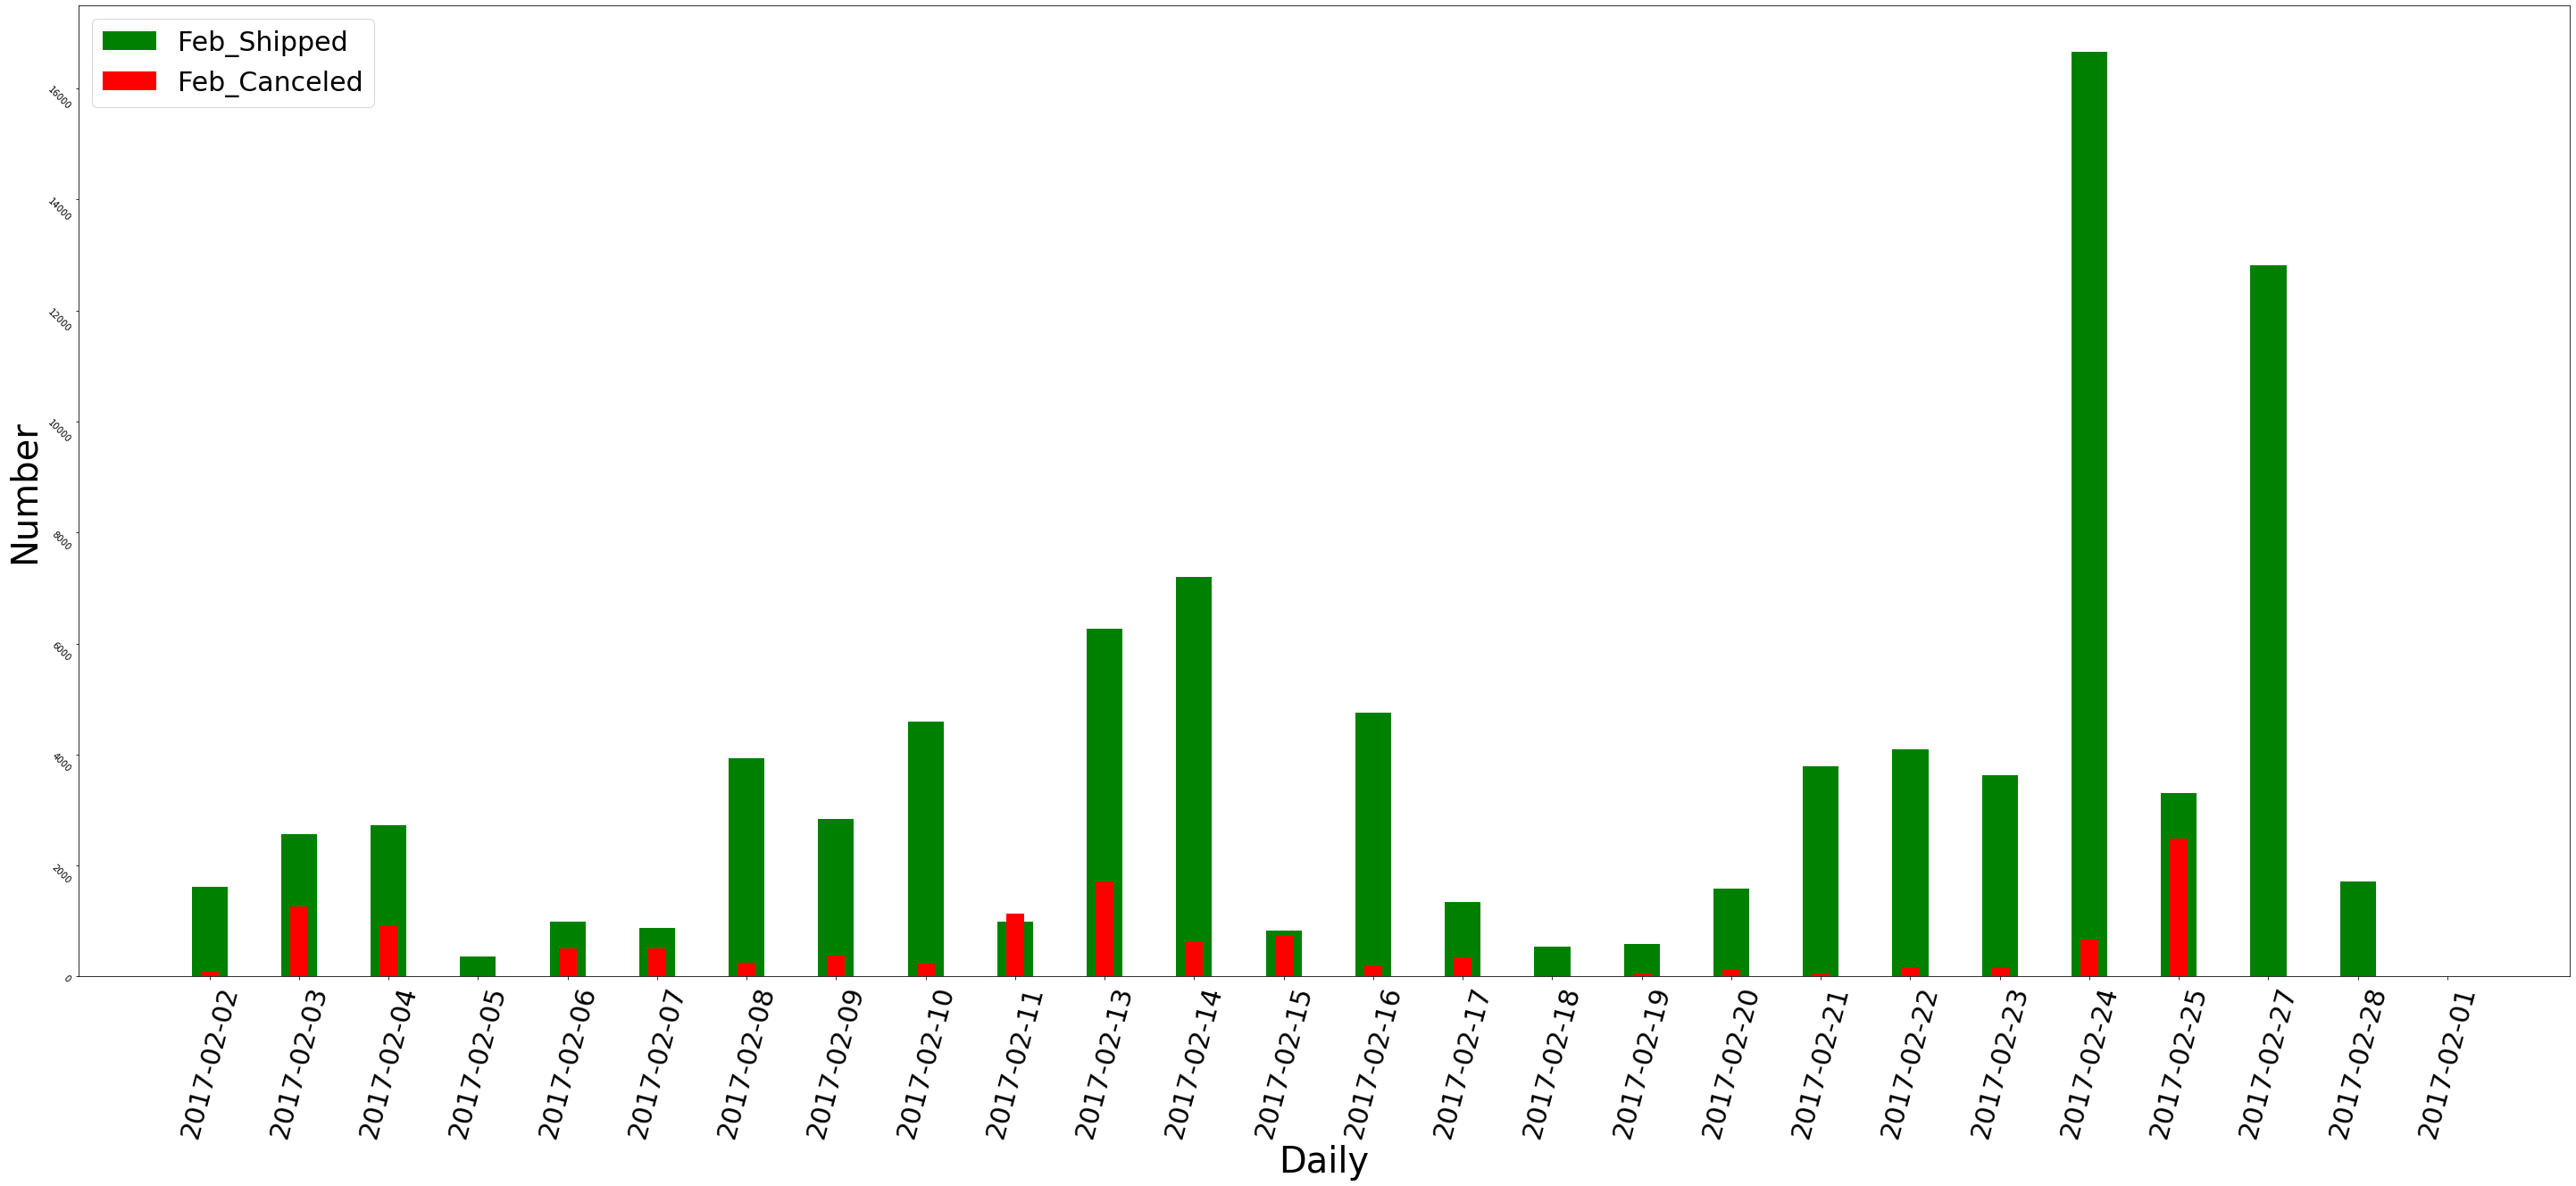

In [172]:
fig = plt.figure()
fig,ax=plt.subplots(figsize=(50,20))


ax.bar(Sale_Shipped_Feb['Order Date'],Sale_Shipped_Feb['Quantity Shipped'],color='g',width = 0.4,label = 'Feb_Shipped')
ax.bar(Sale_Canceled_Feb['Order Date'],Sale_Canceled_Feb['Quantity Canceled'],color='r',width = 0.2, label= 'Feb_Canceled')
ax.set_xlabel('Daily',fontsize=40)
plt.xticks(rotation=75)
ax.set_ylabel('Number',fontsize=40)
plt.yticks(rotation=-45)
ax.legend(loc=2,prop={'size': 30})

Index(['Order Number', 'Line Number', 'Order Date', 'Ship To Address No',
       'Item Code', 'Quantity Ordered', 'Quantity Canceled'],
      dtype='object')

,Order Date,Quantity Shipped
0,2017-01-03,4630.0
1,2017-01-04,2690.0
2,2017-01-05,1213.0
3,2017-01-06,3070.0
4,2017-01-07,449.0
5,2017-01-09,1544.0
6,2017-01-10,1815.0
7,2017-01-11,2959.0
8,2017-01-12,2562.0
9,2017-01-13,732.0
